<a href="https://colab.research.google.com/github/Mintu-Vipin/NPowerCanada_JuniorDataAnalyst/blob/main/Group3_Online_Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Kaggle: https://www.kaggle.com/datasets/sudarshan24byte/online-food-dataset?resource=download

**Dataset columns:**

*   Age: Age of the customer.

*   Gender: Gender of the customer.
*   Marital Status: Marital status of the customer.

*   Occupation: Occupation of the customer.
*   Monthly Income: Monthly income of the customer.

*   Educational Qualifications: Educational qualifications of the customer.

*   Family Size: Number of individuals in the customer's family.

*   Latitude: Latitude of the customer's location.

*   Longitude: Longitude of the customer's location.
*   Pin Code: Pin code of the customer's location.

*   Output: Current status of the order (e.g., pending, confirmed, delivered).

*   Feedback: Feedback provided by the customer after receiving the order.
















**PART 1**

In [15]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from ctypes import alignment
import folium
from folium import plugins

In [4]:
# Load the data

# URL of the raw CSV file on GitHub
filepath ='https://raw.githubusercontent.com/yommigold/NPower-Canada-JDA_Group_3/main/onlinefoods.csv'
food_data = pd.read_csv(filepath)
food_data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [5]:
# No of rows and columns in the dataset
food_data.shape

(388, 13)

In [6]:
# Data set info
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [31]:
# Checking null values
food_data.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [32]:
# statistical data
food_data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


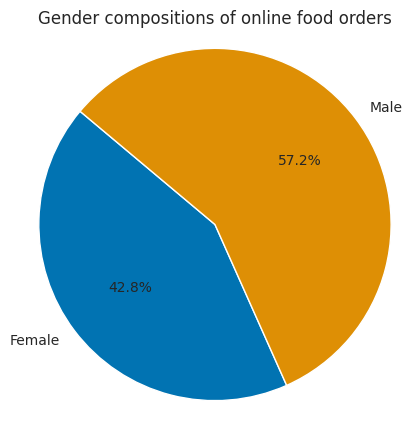

In [26]:
# Plot Pie-chart using 'matplotlib' and 'seaborn' - 'Gender compositions of online food orders'
df_gender = food_data.groupby('Gender').size()

plt.figure(figsize=(5, 5))
# Use Seaborn to set a style
sns.set_style("whitegrid")
# Define a custom color palette
custom_palette = sns.color_palette("colorblind")

plt.pie(df_gender, labels = df_gender.index, autopct='%1.1f%%', startangle=140, colors = custom_palette)
plt.title('Gender compositions of online food orders')
plt.axis('equal')

# # Remove the top and right spines
# sns.despine()

plt.show()

Insight: Male is slightly higher contributors in online food ordering

In [39]:
food_data['Marital Status'].value_counts()

Single               268
Married              108
Prefer not to say     12
Name: Marital Status, dtype: int64

In [53]:
# Plot Pie-chart using 'plotly' - 'Marital Status compositions of online food orders'

df_marital_status = food_data.groupby('Marital Status').size()

# Create a pie chart
fig = go.Figure(data=[go.Pie(labels=df_marital_status.index,
                             values=df_marital_status,
                             textinfo='percent+label',
                             hoverinfo='label+percent',
                             pull=[0, 0, 0.1])])

# Set layout options
fig.update_layout(
    title={'text':'Marital Status compositions of online food orders',
           'y':0.9,
           'x':0.5,
           'xanchor': 'center',
           'yanchor': 'top'})

# Display the plot
fig.show()


Insight: People who are 'Single' are the major contributors to online food ordering

In [10]:
food_data['Occupation'].value_counts()

Student           207
Employee          118
Self Employeed     54
House wife          9
Name: Occupation, dtype: int64

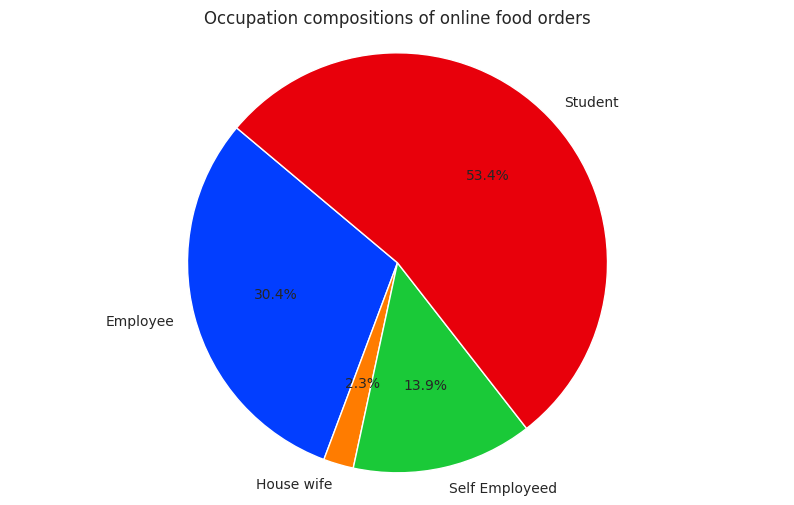

In [11]:
# Plot Pie-chart using 'matplotlib'  and ' seaborn' - 'Occupation compositions of online food orders'

df_occupation = food_data.groupby('Occupation').size()

plt.figure(figsize=(10, 6))
# Use Seaborn to set a style
sns.set_style("whitegrid")
# Define a custom color palette
custom_palette = sns.color_palette("bright")

plt.pie(df_occupation, labels = df_occupation.index, autopct='%1.1f%%', startangle=140, colors = custom_palette)
plt.title('Occupation compositions of online food orders')
plt.axis('equal')

# Remove the top and right spines
sns.despine()

plt.show()

Insight: Students are ordering online more than Employees, self-employed people and house wives combined.

In [56]:
food_data['Family size'].value_counts()


# Plot Pie-chart using 'plotly' - 'Family size compositions of online food orders'

df_family_size = food_data.groupby('Family size').size()

# Create a pie chart
fig = go.Figure(data=[go.Pie(labels=df_family_size.index,
                             values=df_family_size,
                             textinfo='percent+label',
                             hoverinfo='label+percent',
                             pull=[0, 0, 0.1])])

# Set layout options
fig.update_layout(
    title={'text':'Family Size compositions of online food orders',
           'y':0.9,
           'x':0.5,
           'xanchor': 'center',
           'yanchor': 'top'})

# Display the plot
fig.show()


Insight: Family of 3 is the major contributors in online food ordering followed by family of 2

# **Part 2**

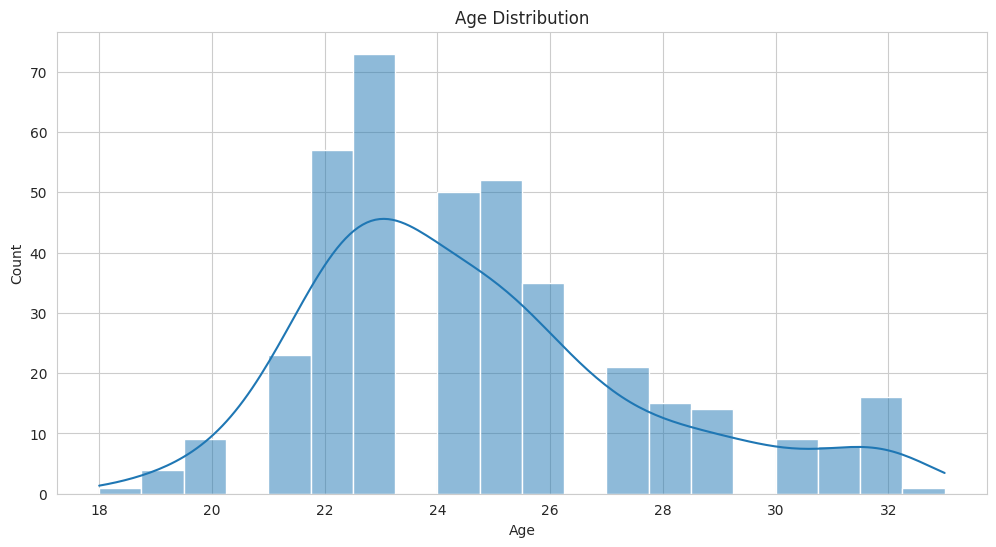

In [41]:

# Demographic Information Visualizations
plt.figure(figsize=(12, 6))
sns.histplot(food_data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


Insight: People who are in their early 20's are major contributors in online food ordering.

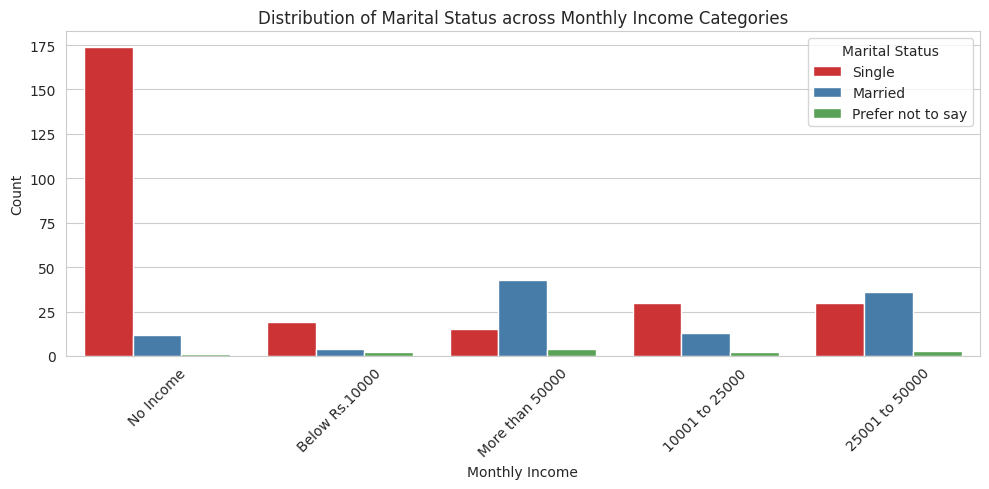

In [46]:
# Marital status Across Monthly Income categories
plt.figure(figsize=(10, 5))
sns.countplot(x='Monthly Income', hue='Marital Status', data=food_data, palette='Set1')
plt.title('Distribution of Marital Status across Monthly Income Categories')
plt.xlabel('Monthly Income')
plt.xticks(rotation=45)  # Rotate labels to avoid overlap
plt.ylabel('Count')
plt.legend(title='Marital Status')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

Insight: People who are married and earning in between 50000 - 1 lakh are the major contributors in online food ordering.

In [20]:
# Display where the data was collected from

# Center map to Bengaluru
map = folium.Map(zoom_start=12, tiles='Cartodb positron')

markers = plugins.MarkerCluster().add_to(map)
# location=[12.972442, 77.580643]
for lat, lng in zip(food_data['latitude'], food_data['longitude']):
  folium.Marker(
      location=[lat, lng],
      icon=None,
  ).add_to(markers)

map